In [1]:
# import tensorflow as tf

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [2]:
print("Parkinson's Disease")

Parkinson's Disease


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

# Change this path to the correct folder in your Google Drive
os.chdir('/content/drive/MyDrive/drawings')

# Check if the folders are correctly listed
print(os.listdir())


['spiral', 'wave']


In [5]:
import os
import cv2
import torch

# Check the GPU device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'
print(f'Using device: {device_name}')

# Define the base directory
base_dir = '/content/drive/MyDrive/drawings'

# Define paths for each category
spiral_training_healthy = []
spiral_training_parkinson = []
spiral_testing_healthy = []
spiral_testing_parkinson = []

wave_training_healthy = []
wave_training_parkinson = []
wave_testing_healthy = []
wave_testing_parkinson = []

# Helper function to load images from a directory
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Load images into respective variables
spiral_training_healthy = load_images_from_folder(os.path.join(base_dir, 'spiral', 'training', 'healthy'))
spiral_training_parkinson = load_images_from_folder(os.path.join(base_dir, 'spiral', 'training', 'parkinson'))
spiral_testing_healthy = load_images_from_folder(os.path.join(base_dir, 'spiral', 'testing', 'healthy'))
spiral_testing_parkinson = load_images_from_folder(os.path.join(base_dir, 'spiral', 'testing', 'parkinson'))

wave_training_healthy = load_images_from_folder(os.path.join(base_dir, 'wave', 'training', 'healthy'))
wave_training_parkinson = load_images_from_folder(os.path.join(base_dir, 'wave', 'training', 'parkinson'))
wave_testing_healthy = load_images_from_folder(os.path.join(base_dir, 'wave', 'testing', 'healthy'))
wave_testing_parkinson = load_images_from_folder(os.path.join(base_dir, 'wave', 'testing', 'parkinson'))

# Print confirmation
print(f'Loaded {len(spiral_training_healthy)} spiral training healthy images')
print(f'Loaded {len(spiral_training_parkinson)} spiral training parkinson images')
print(f'Loaded {len(spiral_testing_healthy)} spiral testing healthy images')
print(f'Loaded {len(spiral_testing_parkinson)} spiral testing parkinson images')

print(f'Loaded {len(wave_training_healthy)} wave training healthy images')
print(f'Loaded {len(wave_training_parkinson)} wave training parkinson images')
print(f'Loaded {len(wave_testing_healthy)} wave testing healthy images')
print(f'Loaded {len(wave_testing_parkinson)} wave testing parkinson images')


Using device: Tesla T4
Loaded 504 spiral training healthy images
Loaded 504 spiral training parkinson images
Loaded 210 spiral testing healthy images
Loaded 210 spiral testing parkinson images
Loaded 504 wave training healthy images
Loaded 504 wave training parkinson images
Loaded 210 wave testing healthy images
Loaded 210 wave testing parkinson images


In [6]:
import cv2
import numpy as np

# Check the GPU device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'
print(f'Using device: {device_name}')

def augment_image(image):
    # Preprocessing (example: Gaussian blur)
    preprocessed_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Brightness
    brightness_image = cv2.convertScaleAbs(image, beta=50)  # Increase brightness

    # Contrast
    contrast_image = cv2.convertScaleAbs(image, alpha=1.5)  # Increase contrast


    # Cropping
    height, width = image.shape[:2]
    start_row, start_col = int(0.2 * height), int(0.2 * width)
    end_row, end_col = int(0.8 * height), int(0.8 * width)
    cropped_image = image[start_row:end_row, start_col:end_col]

    # Flipping (horizontal)
    flipped_image = cv2.flip(image, 1)

    # Rotation
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))

    # Saturation (adjusting color saturation)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 1] = hsv[:, :, 1] * 1.5  # Increase saturation
    saturation_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


    # Scaling
    scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5) #Scale down to half the size

    # Shearing
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0.5, 0],
                    [0, 1  , 0]])
    sheared_image = cv2.warpAffine(image, M, (int(cols*1.2), rows))


    return preprocessed_image, brightness_image, contrast_image, cropped_image, flipped_image, rotated_image, saturation_image, scaled_image, sheared_image




Using device: Tesla T4


Using device: Tesla T4


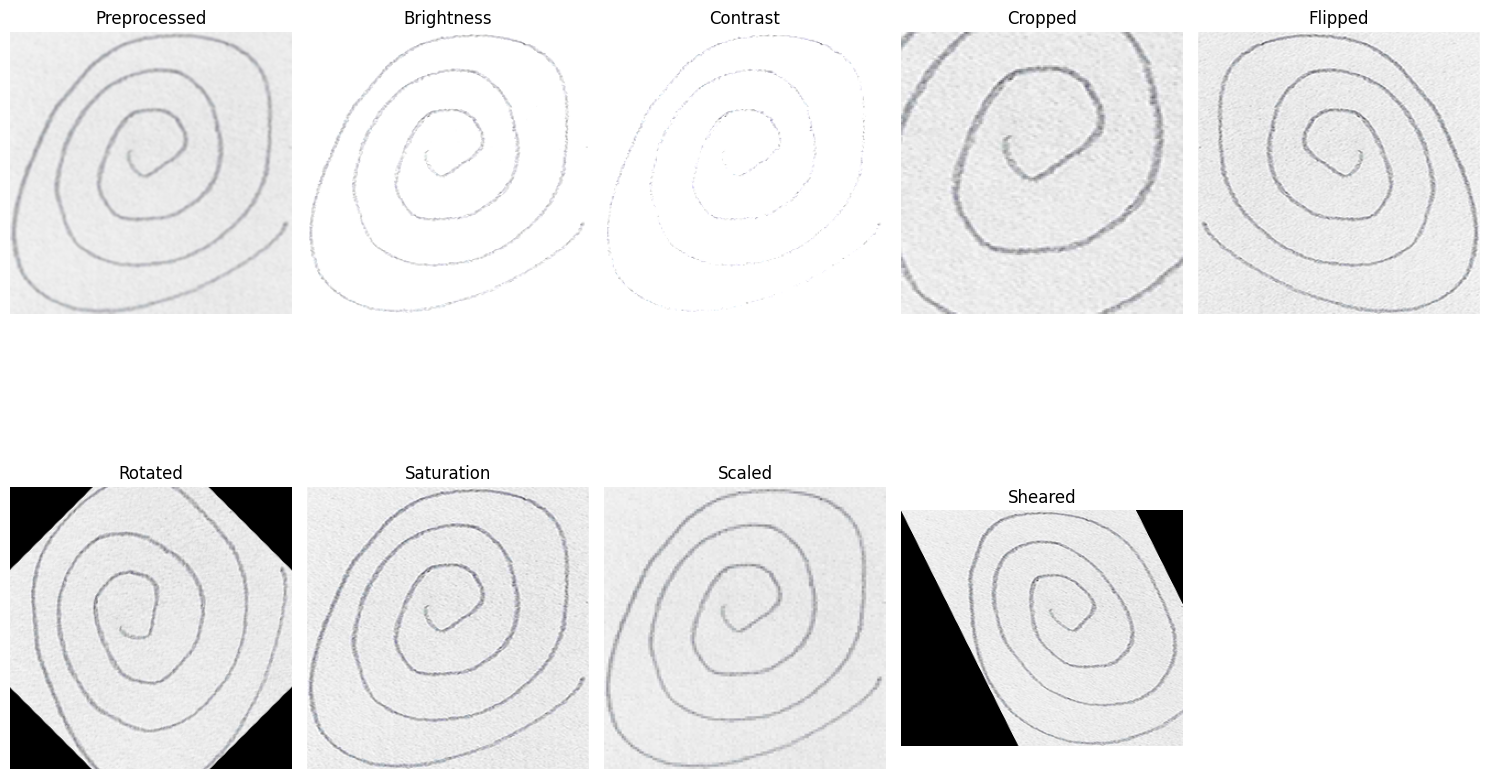

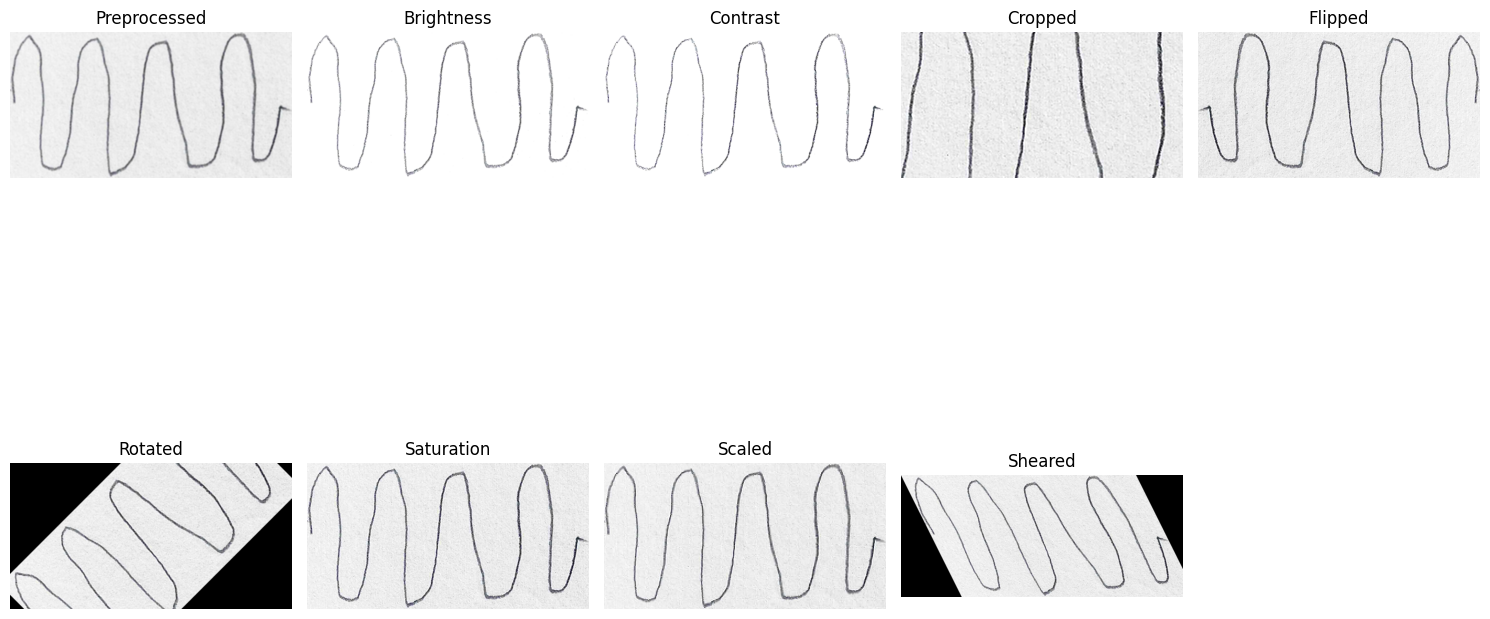

In [7]:
import matplotlib.pyplot as plt

# Check the GPU device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'
print(f'Using device: {device_name}')

def show_augmented_images(image):
    augmented_images = augment_image(image)
    image_titles = ["Original", "Preprocessed", "Brightness", "Contrast", "Cropped", "Flipped", "Rotated", "Saturation", "Scaled", "Sheared"]

    plt.figure(figsize=(15, 10))  # Adjust figure size for better display
    for i, img in enumerate(augmented_images):
      plt.subplot(2, 5, i+1) # Adjust the grid as per number of augmented images
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert from BGR to RGB
      plt.title(image_titles[i+1]) # Display appropriate title
      plt.axis('off') # Hide axis

    plt.tight_layout()  # Adjust layout to prevent overlapping titles
    plt.show()


# Example: Display augmented images for the first spiral training healthy image
if spiral_training_healthy:
    show_augmented_images(spiral_training_healthy[0])

# Example: Display augmented images for the first wave training healthy image
if wave_training_healthy:
    show_augmented_images(wave_training_healthy[0])


In [8]:
from skimage.feature import local_binary_pattern
import numpy as np

def apply_clbp(image):
  # Convert image to grayscale if necessary
  if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
    gray_image = image

  # Apply CLBP
  radius = 3
  n_points = 8 * radius
  clbp_image = local_binary_pattern(gray_image, n_points, radius, method='uniform')
  return clbp_image


def apply_lgxp(image):
    """
    Local Gradient X Pattern (LGXP) implementation.
    Applies the Sobel filter to extract horizontal gradients.
    """
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Sobel filter for horizontal gradients
    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    return cv2.convertScaleAbs(grad_x)

def apply_loop(image):
    """
    Local Optimal Oriented Pattern (LOOP) implementation.
    Applies the Laplacian filter to detect edges and fine details.
    """
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Laplacian filter for edge detection
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

def apply_lvp(image):
    """
    Local Vector Pattern (LVP) implementation.
    Uses Canny edge detection to extract edge features.
    """
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)
    return edges



def process_images(images, method):
    processed_images = []
    for image in images:
        if method == 'clbp':
            processed_images.append(apply_clbp(image))
        elif method == 'lgxp':
            processed_images.append(apply_lgxp(image))
        elif method == 'loop':
            processed_images.append(apply_loop(image))
        elif method == 'lvp':
            processed_images.append(apply_lvp(image))
    return processed_images



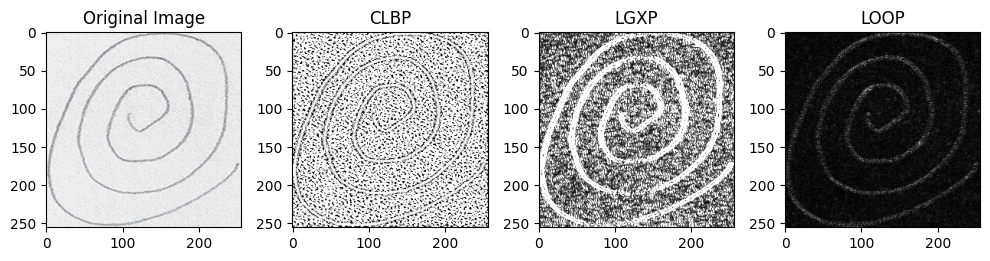

In [9]:

if spiral_training_healthy:
  image = spiral_training_healthy[0]

  # Apply CLBP
  clbp_image = apply_clbp(image)

  # Apply LGXP (replace with your actual implementation)
  lgxp_image = apply_lgxp(image)

  # Apply LOOP (replace with your actual implementation)
  loop_image = apply_loop(image)

  # Apply LVP (replace with your actual implementation)
  lvp_image = apply_lvp(image)


  # Display or further process the results
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 4, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Original Image")

  plt.subplot(1, 4, 2)
  plt.imshow(clbp_image, cmap='gray')
  plt.title("CLBP")

  plt.subplot(1, 4, 3)
  plt.imshow(lgxp_image, cmap='gray')
  plt.title('LGXP')

  plt.subplot(1, 4, 4)
  plt.imshow(loop_image, cmap='gray')
  plt.title('LOOP')


  plt.tight_layout()
  plt.show()





In [10]:
spiral_training_healthy,
spiral_training_parkinson,
spiral_testing_healthy,
spiral_testing_parkinson,

wave_training_healthy,
wave_training_parkinson,
wave_testing_healthy,
wave_testing_parkinson

[array([[[239, 239, 239],
         [232, 232, 232],
         [242, 242, 242],
         ...,
         [231, 231, 231],
         [238, 238, 238],
         [243, 243, 243]],
 
        [[246, 246, 246],
         [246, 246, 246],
         [244, 244, 244],
         ...,
         [235, 235, 235],
         [231, 231, 231],
         [240, 240, 240]],
 
        [[246, 246, 246],
         [247, 247, 247],
         [240, 240, 240],
         ...,
         [251, 251, 251],
         [250, 250, 250],
         [234, 234, 234]],
 
        ...,
 
        [[234, 234, 234],
         [234, 234, 234],
         [243, 243, 243],
         ...,
         [255, 255, 255],
         [234, 234, 234],
         [229, 229, 229]],
 
        [[236, 236, 236],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [236, 236, 236],
         [238, 238, 238],
         [234, 234, 234]],
 
        [[234, 234, 234],
         [237, 237, 237],
         [252, 252, 252],
         ...,
         [212, 212, 212],
  

now use the above functions named "augment_image" and "process images" function to go through each image of the spiral_training_healthy,
spiral_training_parkinson,
spiral_testing_healthy,
spiral_testing_parkinson,

wave_training_healthy,
wave_training_parkinson,
wave_testing_healthy,
wave_testing_parkinson and store the images in separate folders with proper labels which can be used to train a model and create different dataframes in similar fashion in which in am giving you the input

In [11]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from google.colab.patches import cv2_imshow

# Merged function for processing and augmenting images
def process_and_augment_images(images, methods=['clbp', 'lgxp', 'loop', 'lvp'], output_size=(256, 256)):
    processed_images = []
    for image in images:
        # Resize input image to maintain consistent dimensions
        image = cv2.resize(image, output_size)

        # Augmentation Techniques
        preprocessed_image = cv2.GaussianBlur(image, (5, 5), 0)
        brightness_image = cv2.convertScaleAbs(image, beta=50)
        contrast_image = cv2.convertScaleAbs(image, alpha=1.5)
        height, width = image.shape[:2]
        start_row, start_col = int(0.2 * height), int(0.2 * width)
        end_row, end_col = int(0.8 * height), int(0.8 * width)
        cropped_image = image[start_row:end_row, start_col:end_col]
        cropped_image = cv2.resize(cropped_image, output_size)  # Resize cropped image

        flipped_image = cv2.flip(image, 1)

        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
        rotated_image = cv2.warpAffine(image, M, (cols, rows))

        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = hsv[:, :, 1] * 1.5
        saturation_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

        scaled_image = cv2.resize(image, output_size)

        M = np.float32([[1, 0.5, 0], [0, 1, 0]])
        sheared_image = cv2.warpAffine(image, M, (int(cols * 1.2), rows))
        sheared_image = cv2.resize(sheared_image, output_size)  # Resize sheared image

        # Convert to grayscale if necessary
        if len(image.shape) == 3:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = image

        # Apply all methods and store results
        method_results = {}
        for method in methods:
          if method == 'clbp':
              # Completed Local Binary Pattern
              radius = 3
              n_points = 8 * radius
              method_results[method] = local_binary_pattern(gray_image, n_points, radius, method='uniform')

          elif method == 'lgxp':
              # Local Gradient X Pattern (example using Sobel filter for gradients)
              grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
              method_results[method] = cv2.convertScaleAbs(grad_x)

          elif method == 'loop':
              # Local Optimal Oriented Pattern (example using Laplacian)
              laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
              method_results[method] = cv2.convertScaleAbs(laplacian)

          elif method == 'lvp':
              # Local Vector Pattern (example using Canny edge detection)
              edges = cv2.Canny(gray_image, 100, 200)
              method_results[method] = edges

          else:
              # Fallback to the original gray image if the method is not recognized
              method_results[method] = gray_image

        # Resize all method images to ensure consistent dimensions
        method_results = {key: cv2.resize(value, output_size) for key, value in method_results.items()}

        # Collect all images
        processed_images.append({
            'preprocessed': preprocessed_image,
            'brightness': brightness_image,
            'contrast': contrast_image,
            'cropped': cropped_image,
            'flipped': flipped_image,
            'rotated': rotated_image,
            'saturation': saturation_image,
            'scaled': scaled_image,
            'sheared': sheared_image,
            **method_results
        })

    return processed_images




In [12]:
results = process_and_augment_images([spiral_training_healthy[0]])

In [13]:
type(results)

list

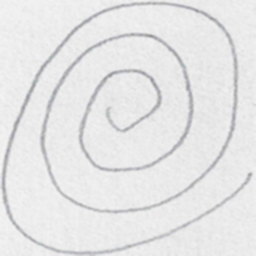

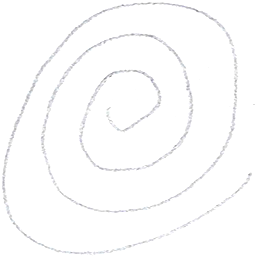

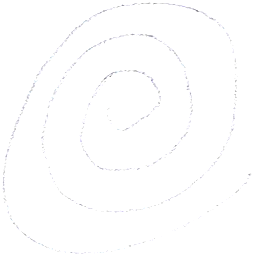

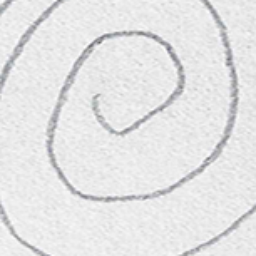

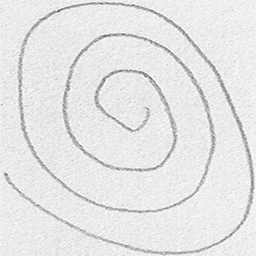

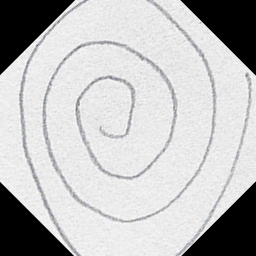

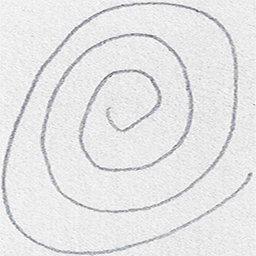

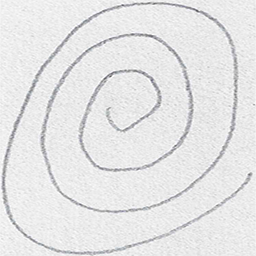

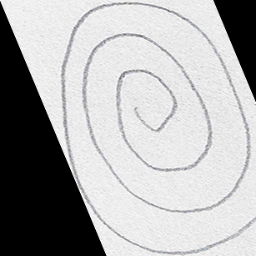

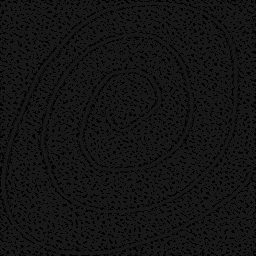

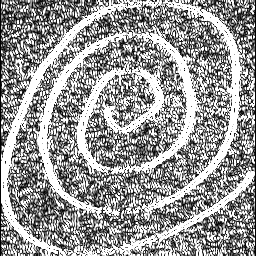

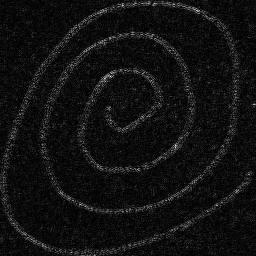

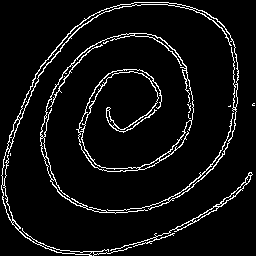

In [14]:
import cv2
from google.colab.patches import cv2_imshow

# Assuming 'results' is defined as in the previous code snippet

if results:
  for image_data in results:
      for method, image in image_data.items():
          # Check if the image is a valid OpenCV image
          if isinstance(image, np.ndarray):  # Check if it's a NumPy array
              cv2_imshow(image)
          else:
              print(f"Skipping invalid image for method: {method}")


In [15]:
# Check the GPU device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'
print(f'Using device: {device_name}')

Using device: Tesla T4


In [16]:
# spiral_training_healthy
# spiral_training_parkinson
# spiral_testing_healthy
# spiral_testing_parkinson

# wave_training_healthy
# wave_training_parkinson
# wave_testing_healthy
# wave_testing_parkinson

In [17]:
# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

# Function to process and save augmented images according to the given folder structure
def process_and_save_images(base_dir, output_dir):
    categories = ['spiral', 'wave']
    phases = ['training', 'testing']
    labels = ['healthy', 'parkinson']

    for category in categories:
        for phase in phases:
            for label in labels:
                folder_path = os.path.join(base_dir, category, phase, label)
                images, filenames = load_images_from_folder(folder_path)
                processed_images = process_and_augment_images(images)
                save_folder = os.path.join(output_dir, category, phase, label)
                os.makedirs(save_folder, exist_ok=True)

                for img_idx, img_set in enumerate(processed_images):
                    for i, (method_name, img) in enumerate(img_set.items()):
                        img_name = f"{os.path.splitext(filenames[img_idx])[0]}_{method_name}_{i}.png"
                        save_path = os.path.join(save_folder, img_name)
                        cv2.imwrite(save_path, img)


In [18]:
# Set the base directory to the root where 'spiral' and 'wave' directories are located
base_dir = '/content/drive/MyDrive/drawings'

# Output directory is the same as base_dir to save in the same folders as the input images
output_dir = base_dir


In [19]:

# Print the current working directory
print(os.getcwd())


/content/drive/MyDrive/drawings


In [20]:
# prompt: code tao check whether i am running code using cpu or gpu

# Check the GPU device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_name = torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'
print(f'Using device: {device_name}')


Using device: Tesla T4


In [21]:
# process_and_save_images(base_dir, output_dir)

In [22]:
def load_images_from_folder(folder_path, label):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((img, label))  # Append a tuple (image, label)
    return images

# Load images with labels
spiral_training_healthy = load_images_from_folder(os.path.join(base_dir, 'spiral', 'training', 'healthy'), 'healthy')
spiral_training_parkinson = load_images_from_folder(os.path.join(base_dir, 'spiral', 'training', 'parkinson'), 'parkinson')
spiral_testing_healthy = load_images_from_folder(os.path.join(base_dir, 'spiral', 'testing', 'healthy'), 'healthy')
spiral_testing_parkinson = load_images_from_folder(os.path.join(base_dir, 'spiral', 'testing', 'parkinson'), 'parkinson')

wave_training_healthy = load_images_from_folder(os.path.join(base_dir, 'wave', 'training', 'healthy'), 'healthy')
wave_training_parkinson = load_images_from_folder(os.path.join(base_dir, 'wave', 'training', 'parkinson'), 'parkinson')
wave_testing_healthy = load_images_from_folder(os.path.join(base_dir, 'wave', 'testing', 'healthy'), 'healthy')
wave_testing_parkinson = load_images_from_folder(os.path.join(base_dir, 'wave', 'testing', 'parkinson'), 'parkinson')


In [23]:
import pandas as pd

def create_dataframe(image_data, category, phase, label):
    image_paths = []
    labels = []
    for image, label_value in image_data:
        # Assuming image is a NumPy array, and you want to store the image data itself in the dataframe
        image_paths.append(image) # Or image path if you prefer
        labels.append(label_value)

    df = pd.DataFrame({
        'image': image_paths,
        'label': labels,
        'category': [category] * len(image_data),
        'phase': [phase] * len(image_data)
    })
    return df

# Example usage
spiral_training_healthy_df = create_dataframe(spiral_training_healthy, 'spiral', 'training', 'healthy')
spiral_training_parkinson_df = create_dataframe(spiral_training_parkinson, 'spiral', 'training', 'parkinson')
spiral_testing_healthy_df = create_dataframe(spiral_testing_healthy, 'spiral', 'testing', 'healthy')
spiral_testing_parkinson_df = create_dataframe(spiral_testing_parkinson, 'spiral', 'testing', 'parkinson')
wave_training_healthy_df = create_dataframe(wave_training_healthy, 'wave', 'training', 'healthy')
wave_training_parkinson_df = create_dataframe(wave_training_parkinson, 'wave', 'training', 'parkinson')
wave_testing_healthy_df = create_dataframe(wave_testing_healthy, 'wave', 'testing', 'healthy')
wave_testing_parkinson_df = create_dataframe(wave_testing_parkinson, 'wave', 'testing', 'parkinson')




In [24]:
training_df = pd.concat([
    spiral_training_healthy_df, spiral_training_parkinson_df, wave_training_healthy_df, wave_training_parkinson_df
], ignore_index=True)

testing_df = pd.concat([
    spiral_testing_healthy_df,spiral_testing_parkinson_df,wave_testing_healthy_df, wave_testing_parkinson_df
], ignore_index=True)

all_data_df = pd.concat([
    spiral_training_healthy_df, spiral_training_parkinson_df, spiral_testing_healthy_df,
    spiral_testing_parkinson_df, wave_training_healthy_df, wave_training_parkinson_df,
    wave_testing_healthy_df, wave_testing_parkinson_df
], ignore_index=True)

print(training_df.head())
print(testing_df.head())
print(all_data_df.info())

                                               image    label category  \
0  [[[243, 243, 243], [238, 238, 238], [241, 241,...  healthy   spiral   
1  [[[236, 236, 236], [239, 239, 239], [243, 243,...  healthy   spiral   
2  [[[242, 242, 242], [240, 240, 240], [239, 239,...  healthy   spiral   
3  [[[245, 245, 245], [242, 242, 242], [239, 239,...  healthy   spiral   
4  [[[236, 236, 236], [237, 237, 237], [240, 240,...  healthy   spiral   

      phase  
0  training  
1  training  
2  training  
3  training  
4  training  
                                               image    label category  \
0  [[[245, 245, 245], [242, 242, 242], [239, 239,...  healthy   spiral   
1  [[[242, 242, 242], [236, 236, 236], [237, 237,...  healthy   spiral   
2  [[[235, 235, 235], [238, 238, 238], [236, 236,...  healthy   spiral   
3  [[[229, 229, 229], [226, 226, 226], [237, 237,...  healthy   spiral   
4  [[[239, 239, 239], [246, 246, 246], [241, 241,...  healthy   spiral   

     phase  
0  testing  


In [25]:
training_df = training_df.drop(['category', 'phase'], axis=1)
testing_df = testing_df.drop(['category', 'phase'], axis=1)
all_data_df = all_data_df.drop(['category', 'phase'], axis=1)


In [26]:
print(training_df.head())
print(testing_df.head())
print(all_data_df.head())

                                               image    label
0  [[[243, 243, 243], [238, 238, 238], [241, 241,...  healthy
1  [[[236, 236, 236], [239, 239, 239], [243, 243,...  healthy
2  [[[242, 242, 242], [240, 240, 240], [239, 239,...  healthy
3  [[[245, 245, 245], [242, 242, 242], [239, 239,...  healthy
4  [[[236, 236, 236], [237, 237, 237], [240, 240,...  healthy
                                               image    label
0  [[[245, 245, 245], [242, 242, 242], [239, 239,...  healthy
1  [[[242, 242, 242], [236, 236, 236], [237, 237,...  healthy
2  [[[235, 235, 235], [238, 238, 238], [236, 236,...  healthy
3  [[[229, 229, 229], [226, 226, 226], [237, 237,...  healthy
4  [[[239, 239, 239], [246, 246, 246], [241, 241,...  healthy
                                               image    label
0  [[[243, 243, 243], [238, 238, 238], [241, 241,...  healthy
1  [[[236, 236, 236], [239, 239, 239], [243, 243,...  healthy
2  [[[242, 242, 242], [240, 240, 240], [239, 239,...  healthy
3  [[[24

In [27]:
# training_df.shape
# testing_df.shape
# all_data_df.shape

In [28]:
training_df.tail()

image      label
2011  [[[235, 235, 235], [244, 244, 244], [241, 241,...  parkinson
2012  [[[7, 7, 7], [25, 25, 25], [9, 9, 9], [25, 25,...  parkinson
2013  [[[0, 0, 0], [136, 136, 136], [30, 30, 30], [4...  parkinson
2014  [[[32, 32, 32], [29, 29, 29], [29, 29, 29], [5...  parkinson
2015  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  parkinson

In [29]:
all_data_df['label'].unique()

array(['healthy', 'parkinson'], dtype=object)

In [30]:
all_data_df['label'].value_counts()

label
healthy      1428
parkinson    1428
Name: count, dtype: int64

<ipython-input-31-93dbb9ff0d1d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_data_df, x='label', palette='viridis')


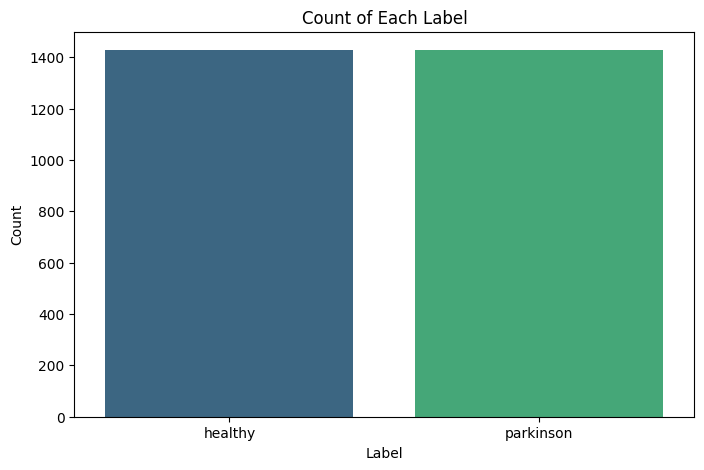

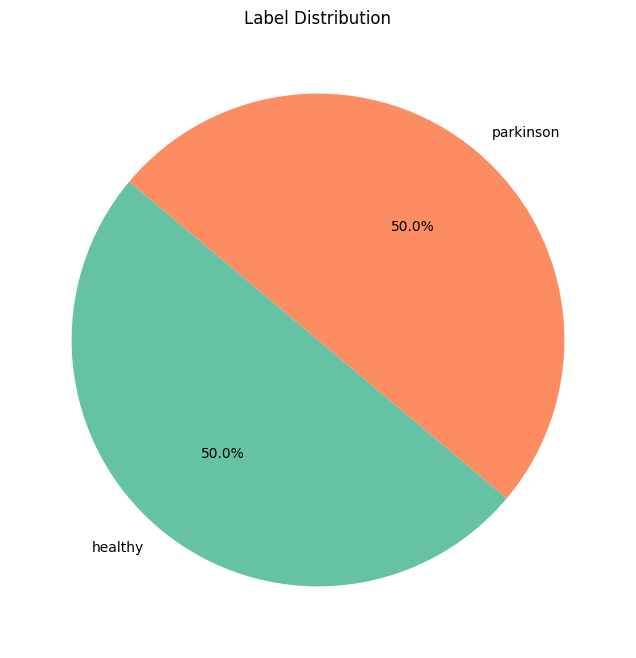

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=all_data_df, x='label', palette='viridis')
plt.title("Count of Each Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 8))
all_data_df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title("Label Distribution")
plt.ylabel("")
plt.show()

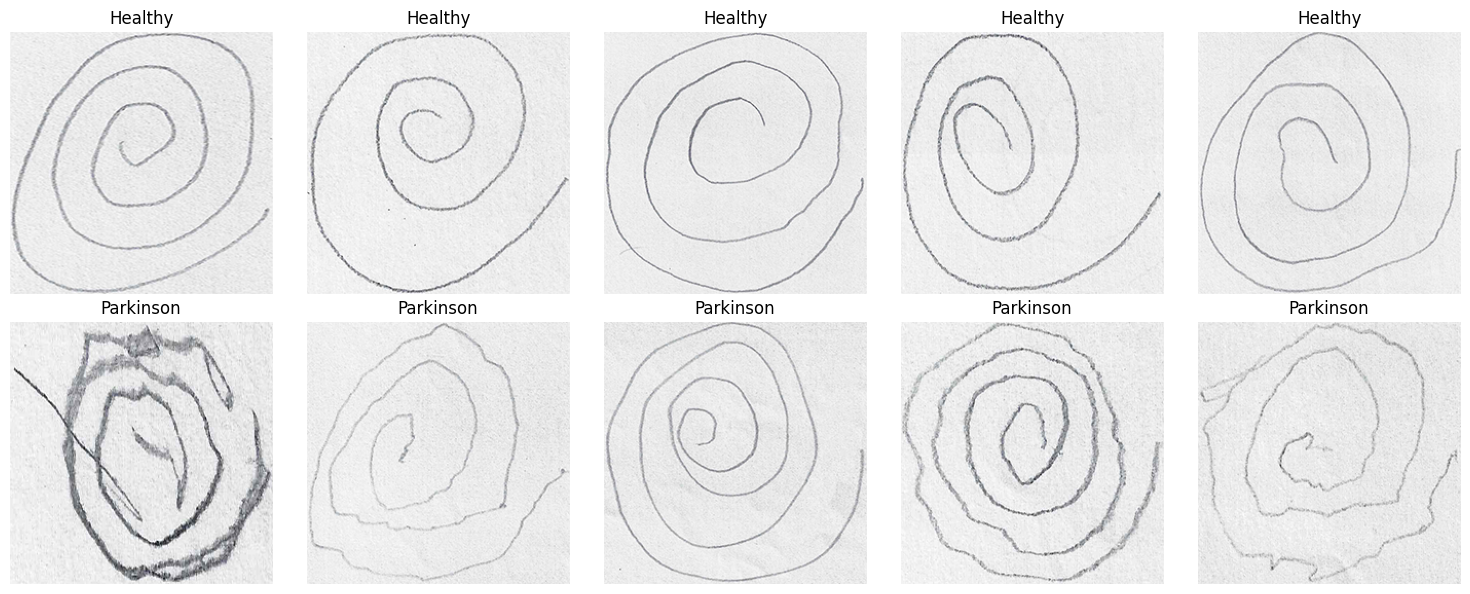

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Displaying Healthy images
    img_healthy = all_data_df[all_data_df['label'] == 'healthy'].iloc[i]['image']
    axes[0, i].imshow(cv2.cvtColor(img_healthy, cv2.COLOR_BGR2RGB), cmap='gray')
    axes[0, i].set_title("Healthy")
    axes[0, i].axis('off')

    # Displaying Parkinson images
    img_parkinson = all_data_df[all_data_df['label'] == 'parkinson'].iloc[i]['image']
    axes[1, i].imshow(cv2.cvtColor(img_parkinson, cv2.COLOR_BGR2RGB), cmap='gray')
    axes[1, i].set_title("Parkinson")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [33]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [34]:
# Normalize the 'image' column by dividing by 255
all_data_df['image'] = all_data_df['image'].apply(lambda x: x / 255.0)

In [35]:
train_df_new, temp_df_new = train_test_split(
    all_data_df,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=all_data_df['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)


In [36]:
all_data_df.head()


image    label
0  [[[0.9529411764705882, 0.9529411764705882, 0.9...  healthy
1  [[[0.9254901960784314, 0.9254901960784314, 0.9...  healthy
2  [[[0.9490196078431372, 0.9490196078431372, 0.9...  healthy
3  [[[0.9607843137254902, 0.9607843137254902, 0.9...  healthy
4  [[[0.9254901960784314, 0.9254901960784314, 0.9...  healthy

In [37]:
print(all_data_df.dtypes)


image    object
label    object
dtype: object


In [38]:
all_data_df.head()

image    label
0  [[[0.9529411764705882, 0.9529411764705882, 0.9...  healthy
1  [[[0.9254901960784314, 0.9254901960784314, 0.9...  healthy
2  [[[0.9490196078431372, 0.9490196078431372, 0.9...  healthy
3  [[[0.9607843137254902, 0.9607843137254902, 0.9...  healthy
4  [[[0.9254901960784314, 0.9254901960784314, 0.9...  healthy

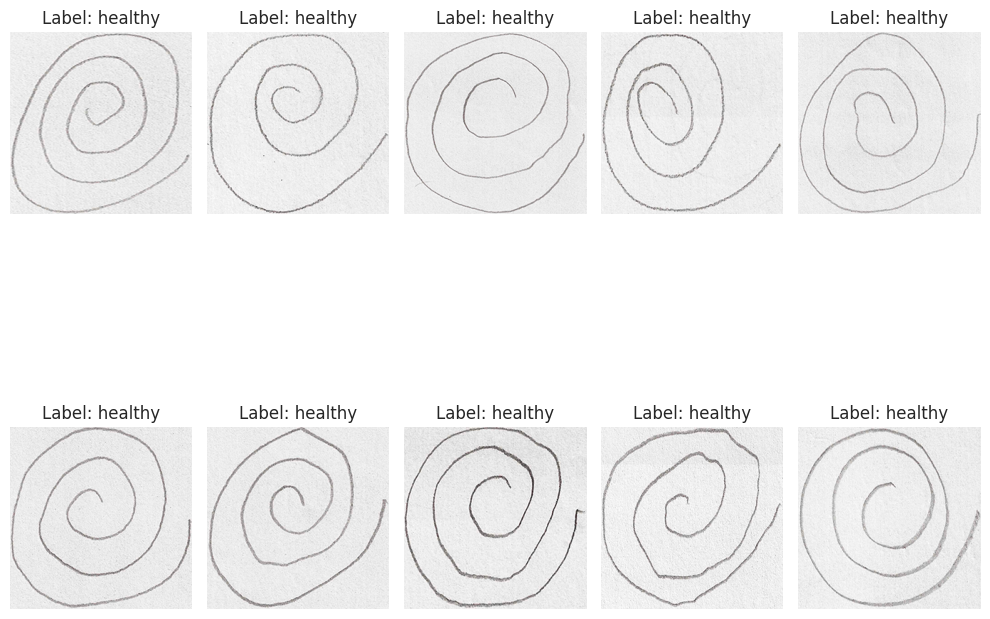

In [39]:
import matplotlib.pyplot as plt

# Display the first 10 images with their labels
plt.figure(figsize=(10, 10))
for i, row in enumerate(all_data_df.head(10).itertuples(), start=1):
    img = row.image  # Assuming img is already a numpy array
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(f'Label: {row.label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [40]:
# prompt: code to check size of the image

def get_image_size(image):
    """
    Gets the dimensions of an image.

    Args:
      image: A NumPy array representing the image.

    Returns:
      A tuple (height, width) representing the image dimensions, or None if the input is invalid.
    """
    if isinstance(image, np.ndarray):
        height, width = image.shape[:2]  # Get height and width from the first two dimensions
        return height, width
    else:
        return None  # Or handle the invalid input as needed


# Example usage within your existing code:
for i, row in enumerate(all_data_df.head(10).itertuples(), start=1):
    img = row.image
    image_size = get_image_size(img)
    if image_size:
      height, width = image_size
      print(f"Image {i}: Height={height}, Width={width}")
    else:
      print(f"Image {i} is not a valid image array")
    # plt.subplot(2, 5, i)
    # plt.imshow(img)
    # plt.title(f'Label: {row.label}')
    # plt.axis('off')


Image 1: Height=256, Width=256
Image 2: Height=256, Width=256
Image 3: Height=256, Width=256
Image 4: Height=256, Width=256
Image 5: Height=256, Width=256
Image 6: Height=256, Width=256
Image 7: Height=256, Width=256
Image 8: Height=256, Width=256
Image 9: Height=256, Width=256
Image 10: Height=256, Width=256


In [41]:
# Function to resize image to 224x224
def resize_image(image, size=(224, 224)):
    resized_image = cv2.resize(image, size)
    return resized_image

# Example usage: Assuming 'all_data_df' is your DataFrame
for i, row in all_data_df.iterrows():
    img = row['image']
    resized_img = resize_image(img)
    all_data_df.at[i, 'image'] = resized_img  # Use .at instead of .loc for setting a single value


In [42]:
# prompt: code to check size of the image

def get_image_size(image):
    """
    Gets the dimensions of an image.

    Args:
      image: A NumPy array representing the image.

    Returns:
      A tuple (height, width) representing the image dimensions, or None if the input is invalid.
    """
    if isinstance(image, np.ndarray):
        height, width = image.shape[:2]  # Get height and width from the first two dimensions
        return height, width
    else:
        return None  # Or handle the invalid input as needed


# Example usage within your existing code:
for i, row in enumerate(all_data_df.head(10).itertuples(), start=1):
    img = row.image
    image_size = get_image_size(img)
    if image_size:
      height, width = image_size
      print(f"Image {i}: Height={height}, Width={width}")
    else:
      print(f"Image {i} is not a valid image array")
    # plt.subplot(2, 5, i)
    # plt.imshow(img)
    # plt.title(f'Label: {row.label}')
    # plt.axis('off')


Image 1: Height=224, Width=224
Image 2: Height=224, Width=224
Image 3: Height=224, Width=224
Image 4: Height=224, Width=224
Image 5: Height=224, Width=224
Image 6: Height=224, Width=224
Image 7: Height=224, Width=224
Image 8: Height=224, Width=224
Image 9: Height=224, Width=224
Image 10: Height=224, Width=224


In [43]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [45]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [46]:
# # prompt: code to split the all_data_df

# from sklearn.model_selection import train_test_split

# # Assuming 'all_data_df' is your DataFrame

# # Split the data into training, validation, and test sets
# train_df_new, temp_df_new = train_test_split(
#     all_data_df,
#     train_size=0.8,  # 80% for training
#     shuffle=True,
#     random_state=42,  # for reproducibility
#     stratify=all_data_df['label']  # maintain class proportions
# )

# valid_df_new, test_df_new = train_test_split(
#     temp_df_new,
#     test_size=0.5,  # Split remaining 20% into 10% validation and 10% test
#     shuffle=True,
#     random_state=42,
#     stratify=temp_df_new['label']
# )

# # Now you have three DataFrames: train_df_new, valid_df_new, and test_df_new
# print(f"Training set size: {train_df_new.shape}")
# print(f"Validation set size: {valid_df_new.shape}")
# print(f"Test set size: {test_df_new.shape}")


In [47]:
# # prompt: use image generator to avoid the RAM crash

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # ... (Your existing code) ...


# # Create ImageDataGenerators for training, validation, and test sets
# train_datagen = ImageDataGenerator(
#     rescale=1./255,  # Rescale pixel values to [0, 1]
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# validation_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)


# # Define the target size (must match the input shape of your model)
# target_size = (224, 224)

# # Define batch size
# batch_size = 32  # Adjust as needed based on your GPU memory

# # Create generators from your DataFrames
# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_df_new,
#     x_col='image',
#     y_col='label',
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='binary' # Assuming binary classification (healthy/parkinson)
# )

# validation_generator = validation_datagen.flow_from_dataframe(
#     dataframe=valid_df_new,
#     x_col='image',
#     y_col='label',
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='binary'
# )

# test_generator = test_datagen.flow_from_dataframe(
#     dataframe=test_df_new,
#     x_col='image',
#     y_col='label',
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='binary',
#     shuffle = False # Important for proper evaluation
# )


# # ... (Rest of your model training code using the generators) ...

# history = cnn_model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=50,  # Adjust as needed
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     callbacks=[early_stopping]
# )


# # Evaluate the model
# loss, accuracy = cnn_model.evaluate(test_generator, steps=test_generator.samples // batch_size)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")


In [48]:
# # prompt: do the further work

# from tensorflow.keras.layers import Input, Reshape, MultiHeadAttention, GaussianNoise, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # ... (your existing code) ...

# input_shape = (224, 224, 3)
# cnn_model = create_inception_model(input_shape)

# cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

# # Convert labels to numerical values (0 or 1)
# train_df_new['label'] = train_df_new['label'].map({'healthy': 0, 'parkinson': 1})
# valid_df_new['label'] = valid_df_new['label'].map({'healthy': 0, 'parkinson': 1})
# test_df_new['label'] = test_df_new['label'].map({'healthy': 0, 'parkinson': 1})


# # Train the model
# history = cnn_model.fit(
#     np.array(train_df_new['image'].to_list()),
#     np.array(train_df_new['label'].to_list()),
#     epochs=50,  # Adjust the number of epochs as needed
#     batch_size=32, # Adjust the batch size as needed
#     validation_data=(np.array(valid_df_new['image'].to_list()), np.array(valid_df_new['label'].to_list())),
#     callbacks=[early_stopping]
# )

# # Evaluate the model
# loss, accuracy = cnn_model.evaluate(np.array(test_df_new['image'].to_list()), np.array(test_df_new['label'].to_list()))
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")


In [49]:
# history = cnn_model.fit(
#     train_gen_new,
#     validation_data=valid_gen_new,
#     epochs=10,
#     callbacks=[early_stopping],
#     verbose=1
# )

In [50]:
all_data_df.head()

image    label
0  [[[0.9506602641056422, 0.9506602641056422, 0.9...  healthy
1  [[[0.9268107242897159, 0.9268107242897159, 0.9...  healthy
2  [[[0.9470588235294117, 0.9470588235294117, 0.9...  healthy
3  [[[0.959483793517407, 0.959483793517407, 0.959...  healthy
4  [[[0.9260904361744698, 0.9260904361744698, 0.9...  healthy

In [52]:
all_data_df.sample(10)

image      label
2654  [[[0.9505864845938375, 0.9505864845938375, 0.9...  parkinson
2550  [[[0.9135054021608643, 0.9135054021608643, 0.9...    healthy
32    [[[0.9296889068127251, 0.9296889068127251, 0.9...    healthy
1455  [[[0.9184873949579831, 0.9184873949579831, 0.9...    healthy
1593  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...    healthy
2698  [[[0.01256502601040416, 0.01256502601040416, 0...  parkinson
1456  [[[0.9363845538215286, 0.9363845538215286, 0.9...    healthy
2366  [[[0.9088835534213685, 0.9088835534213685, 0.9...  parkinson
2851  [[[0.9203481392557022, 0.9203481392557022, 0.9...  parkinson
1269  [[[0.03331332533013204, 0.03331332533013204, 0...  parkinson

In [53]:
all_data_df['label'].value_counts()

label
healthy      1428
parkinson    1428
Name: count, dtype: int64